In [1]:
from pycaret.utils import version
version()

'3.2.0'

In [10]:
import pandas as pd
from typing import List
from pathlib import Path
import os
from pycaret.classification import *


# Data Loader

In [3]:
def load_patient(patient: str) -> {}:
    data_path = Path("..","data", "mapped_data")

    data_frames: dict = {}

    for root, dirs, files in os.walk(data_path):
        for file in files:

            if Path(file).suffix != ".csv":
                continue

            if patient not in file:
                continue

            print(file)

            data_frames[Path(file).stem] = pd.read_csv(Path(data_path, file))

    return data_frames

In [4]:
def load_files(patient_to_be_excluded: str) -> (pd.DataFrame, List):
    if not patient_to_be_excluded:
        raise ValueError("Patient to be excluded needs to be specified.")

    data_path = Path("..", "data", "mapped_data")

    data_frames: [pd.DataFrame] = []
    loaded_files = []
    for root, dirs, files in os.walk(data_path):
        for file in files:

            if Path(file).suffix != ".csv":
                continue

            if patient_to_be_excluded in file:
                continue

            print(file)

            data_frames.append(pd.read_csv(Path(data_path, file)))
            loaded_files.append(file)

    data_frames = pd.concat(data_frames, axis=0)
    return data_frames, loaded_files

In [5]:
patient = "patient_a"

In [6]:
train_set, _ = load_files(patient)

train_set = train_set.drop(columns=["Patient Id", "Sample Id", "CellID", "MouseIgG1"])


patient_d_272840.csv
patient_c_272830.csv
patient_c_303148.csv
patient_d_321920.csv


In [7]:
test_sets: dict = load_patient(patient=patient)

patient_a_322078.csv
patient_a_265303.csv


In [8]:
train_set.reset_index(drop=True, inplace=True)

In [9]:
train_set.shape

(103472, 55)

# Experiment

In [14]:
test_set = list(test_sets.values())[1]
test_set = test_set.drop(columns=["Patient Id", "Sample Id", "CellID", "MouseIgG1"])
test_set.reset_index(drop=True, inplace=True)

In [15]:
test_set.shape

(35943, 55)

In [13]:
experiment = setup(data=train_set, target='Treatment', index=False)

,Description,Value
0,Session id,7478
1,Target,Treatment
2,Target type,Binary
3,Target mapping,"ON: 0, PRE: 1"
4,Original data shape,"(103472, 55)"
5,Transformed data shape,"(103472, 55)"
6,Transformed train set shape,"(72430, 55)"
7,Transformed test set shape,"(31042, 55)"
8,Numeric features,54
9,Preprocess,True


In [17]:
# Perform initial model comparison.
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9964,0.9999,0.9964,0.9964,0.9964,0.9921,0.9921,1.8570
et,Extra Trees Classifier,0.9960,0.9999,0.9960,0.9960,0.9960,0.9912,0.9912,2.1710
rf,Random Forest Classifier,0.9954,0.9999,0.9954,0.9954,0.9954,0.9897,0.9898,4.5200
gbc,Gradient Boosting Classifier,0.9828,0.9982,0.9828,0.9828,0.9828,0.9617,0.9618,10.7970
dt,Decision Tree Classifier,0.9644,0.9605,0.9644,0.9645,0.9644,0.9210,0.9210,0.8770
ada,Ada Boost Classifier,0.9530,0.9887,0.9530,0.9529,0.9529,0.8952,0.8953,2.0720
lr,Logistic Regression,0.9290,0.9718,0.9290,0.9287,0.9286,0.8406,0.8411,3.5840
knn,K Neighbors Classifier,0.8967,0.9497,0.8967,0.8963,0.8964,0.7694,0.7695,1.5050
lda,Linear Discriminant Analysis,0.8904,0.9597,0.8904,0.8931,0.8872,0.7450,0.7537,0.3780
ridge,Ridge Classifier,0.8888,0.0000,0.8888,0.8919,0.8853,0.7404,0.7501,0.1030


In [18]:
# Predict on test set
predict_model(best, data=test_set)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5564,0,0.5564,1.0000,0.7150,0.0000,0.0000


,41BB,B7H3,Bcl2,BetaCatenin,CCR7,CD11b,CD11c,CD127,CD14,CD19,...,SMA,STING,Syndecan1,Tbet,TCF1TCF7,TIM3,Vimentin,Treatment,prediction_label,prediction_score
0,2.583333,7.166667,3.416667,6.916667,1.583333,2.500000,1.666667,40.416668,0.833333,1.750000,...,35.500000,10.166667,0.916667,2.583333,1.666667,3.916667,170.000000,ON,PRE,0.9369
1,3.416667,7.333333,2.083333,3.083333,2.291667,2.625000,2.000000,8.791667,0.708333,2.083333,...,19.916666,6.125000,1.000000,3.625000,2.166667,3.458333,42.041668,ON,PRE,0.9107
2,1.750000,1.500000,1.750000,1.000000,1.250000,2.000000,1.000000,3.250000,0.250000,0.750000,...,4.750000,3.750000,0.750000,2.000000,1.000000,2.250000,9.250000,ON,ON,0.6876
3,3.647059,15.941176,3.235294,4.352941,2.058824,3.000000,2.352941,16.411764,1.000000,2.470588,...,33.823528,8.764706,1.294118,4.176471,2.882353,3.941176,61.294117,ON,PRE,0.9718
4,3.609756,5.853659,2.560976,1.390244,2.341463,3.292683,3.048780,6.219512,0.487805,2.317073,...,74.609756,5.414634,1.048780,3.634146,2.731707,3.804878,39.902439,ON,ON,0.6049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35938,3.750000,2.500000,2.000000,1.000000,2.000000,2.750000,2.250000,4.000000,0.500000,2.000000,...,5.250000,2.750000,0.750000,4.750000,1.750000,4.750000,6.250000,ON,ON,0.9762
35939,3.793103,4.551724,3.000000,2.482759,2.172414,2.724138,2.620690,5.982759,0.724138,2.206897,...,5.534483,3.879310,1.172414,3.689655,3.051724,4.051724,5.224138,ON,PRE,0.9044
35940,3.000000,1.714286,2.285714,0.857143,1.857143,2.428571,2.571429,4.000000,0.142857,1.714286,...,4.000000,2.142857,0.428571,3.857143,1.714286,3.428571,4.285714,ON,ON,0.9243
35941,1.250000,0.750000,0.750000,0.750000,0.750000,1.000000,0.750000,2.500000,0.000000,0.750000,...,3.250000,1.250000,0.500000,2.500000,1.000000,2.000000,3.750000,ON,PRE,0.7385


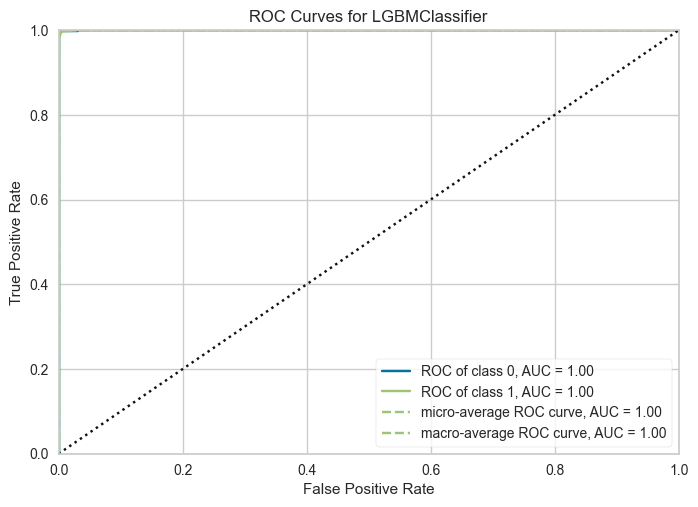

In [19]:
# Plot ROC curves for best model.
plot_model(best)

In [19]:
# Create a lightGBM model since it's very accurate and fast.
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9968,1.0000,0.9968,0.9968,0.9968,0.9929,0.9929
1,0.9971,0.9999,0.9971,0.9971,0.9971,0.9936,0.9936
2,0.9956,0.9999,0.9956,0.9956,0.9956,0.9902,0.9902
3,0.9960,0.9999,0.9960,0.9960,0.9960,0.9911,0.9911
4,0.9960,0.9999,0.9960,0.9960,0.9960,0.9911,0.9911
5,0.9961,0.9999,0.9961,0.9961,0.9961,0.9914,0.9914
6,0.9975,0.9999,0.9975,0.9975,0.9975,0.9945,0.9945
7,0.9964,0.9999,0.9964,0.9964,0.9964,0.9920,0.9920
8,0.9981,1.0000,0.9981,0.9981,0.9981,0.9957,0.9957


In [ ]:
# Plot feature impact across classes.
interpret_model(lightgbm)

In [ ]:
# Create global SHAP plot for lightgbm.
interpret_model(lightgbm, plot='reason', observation=0)

In [ ]:
# Plot confusion matrix.
plot_model(lightgbm, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

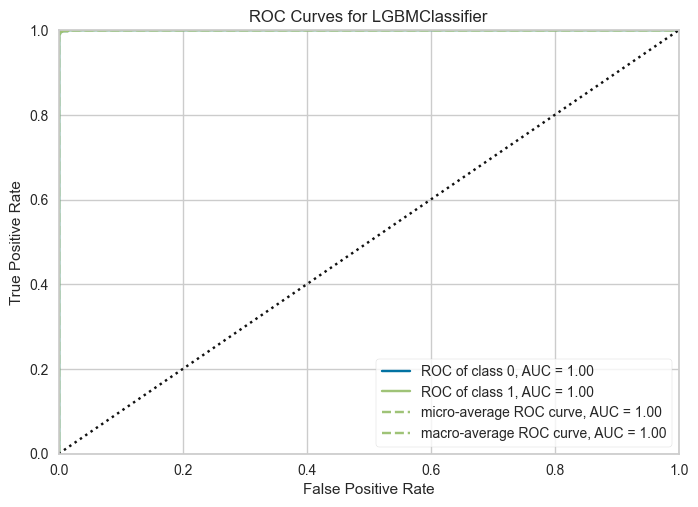

In [20]:
plot_model(lightgbm)